# Car dataset

## This is an analysis of a car dataset, showing the price of vehicles by different configuration, year of purchase, mileage and owner.

## The objective of this analysis is as follows:

### To have an idea as to the type of car a person should purchase based on its configuration.
### To have an idea of when to sell so as to get a good asking price.
### To make a decision on fuel type to purchase based on type of use.
### What type of seller should one purchase from.
### The correlating features.

#### Importing necesaary libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
import os
from datetime import datetime

#### Setting defaults

In [2]:
plt.style.use('seaborn')
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

#### Reading the data into jupyter notebook

In [3]:
path = r'C:\Users\Jchukwuedozi\Documents\data science\datasets'

In [4]:
cars = pd.read_csv(os.path.join(path, 'Car\Car details v3.csv'))

In [5]:
# Torque in hp
# Engine in cc
# mileage in kmpl
# max_power in bhp

#### Showing a preview of what the data looks like

In [6]:
cars.head(5)

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.7 kmpl,1497 CC,78 bhp,"12.7@ 2,700(kgm@ rpm)",5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5.0


## Data preparation stage, where cleaning and processing takes place

### Creating an age column and an age category column from the dataset in order to help deriver insight from the influence of influence of age on the dataset and dropping the year feature.

In [7]:
def car_age(year):
    current_date = datetime.now()
    current_year = current_date.year
    return current_year - year

In [8]:
cars.insert(6, 'age', cars['year'].apply(car_age))

In [9]:
cars.insert(7, 'age_cat', pd.cut(cars.age, bins=[0, 5, 15, 25, 100], labels=['A', 'B', 'C', 'D']))

In [10]:
cars.drop(columns=['year'], inplace=True)

### The lines of code below helped change the torque feature from an object to a numeric, continuous field. It was converted from the power and revolution per minute to its equivalent in horse power

In [11]:
cars.replace({'380Nm(38.7kgm)@ 2500rpm': '380Nm@ 2500rpm', '400 Nm /2000 rpm': '400Nm@ 2000rpm'}, inplace=True)

In [12]:
def torque_hp(value):
    try:
    # def second_case(value):
        value = value.replace('~', '-')
        if 'at' in value:
            if 'Nm' in value:
                torque = float(value.split('N')[0].strip())
                rpm = float(value.split('t')[-1].split('-')[-1].split('r')[0].strip().replace(',',''))
                return round((torque*rpm)/7127, 2)
            elif 'kgm' in value:
                torque = float(value.split(' ')[0].split('k')[0].split('K')[0].strip())
                rpm = float(value.split('t')[-1].split('-')[-1].split('r')[0].strip().replace(',',''))
                return round(((torque*9.80665)*rpm)/7127, 2)

    # def third_case(value):
        elif '-' in value and not '(' in value:
            if 'Nm' in value:
                torque = float(value.split('N')[0].strip())
                rpm = float(value.split('-')[-1][:-3].strip())
                return round((torque*rpm)/7127, 2)
            elif 'kgm' in value or 'Kgm' in value or 'KGM' in value:
                torque = float(value.split(' ')[0].split('k')[0].split('K')[0].strip())
                rpm = float(value.split('-')[1][:-3].strip().replace(',',''))
                return round(((torque*9.80665)*rpm)/7127, 2)

    # def fourth_case(value):
        elif '(' in value:
            if 'Nm' in value:
                torque = float(value.split('N')[0].strip())
                rpm = float(value.split('-')[-1][:-3].strip().replace(',',''))
                return round((torque*rpm)/7127, 2)
            elif 'kgm' in value or 'Kgm' in value or 'KGM' in value:
                torque = float(value.split(' ')[0].split('@')[0].split('K')[0].strip())
                rpm = float(value.split(' ')[1].split('(')[0].split('-')[-1].strip().replace(',',''))
                return round(((torque*9.80665)*rpm)/7127, 2)

        elif 'Nm' in value:
            torque = float(value.split(' ')[0][:-3])
            rpm = float(value.split(' ')[-1][:-3].replace(',',''))
            return round((torque*rpm)/7127, 2)
        elif 'kgm' in value:
            torque = float(value.split(' ')[0][:-4])
            rpm = float(value.split(' ')[1][:-3].replace(',',''))
            return round(((torque*9.80665)*rpm)/7127, 2)
    except:
        return np.nan

In [13]:
cars['torque'] = cars.torque.apply(torque_hp)

### The code below convets the mileage, engine and max_power features into numeric values

In [14]:
def conversion(car):
    try:
        car = str(car).split(' ')[0]
        return float(car)
    except:
        return np.nan
cars.mileage = cars.mileage.apply(conversion)
cars.max_power = cars.max_power.apply(conversion)
cars.engine = cars.engine.apply(conversion)

In [15]:
cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8128 entries, 0 to 8127
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   name           8128 non-null   object  
 1   selling_price  8128 non-null   int64   
 2   km_driven      8128 non-null   int64   
 3   fuel           8128 non-null   object  
 4   seller_type    8128 non-null   object  
 5   age            8128 non-null   int64   
 6   age_cat        8128 non-null   category
 7   transmission   8128 non-null   object  
 8   owner          8128 non-null   object  
 9   mileage        7907 non-null   float64 
 10  engine         7907 non-null   float64 
 11  max_power      7912 non-null   float64 
 12  torque         7624 non-null   float64 
 13  seats          7907 non-null   float64 
dtypes: category(1), float64(5), int64(3), object(5)
memory usage: 833.8+ KB


### From the dataset, features like engine, torque, max_power, mileage and seats have missing fields. Since they are continuous values, distribution plots are used here to show the kind of skewness each feature has, so as to make the decision of which measure of central tendency to use for filling nan values.


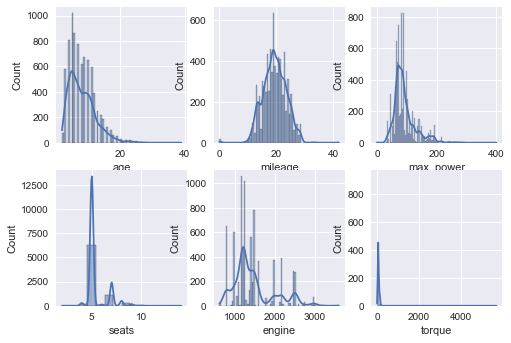

In [16]:
columns = ['age', 'mileage', 'max_power', 'seats', 'engine', 'torque']
fig, ax = plt.subplots(2,3)
for i, j in zip(ax.flat, columns):
    sns.histplot(cars[j], kde=True, ax=i)

In [17]:
cars.fillna({'mileage': cars.mileage.mean(), 'engine': cars.engine.median(),\
            'max_power': cars.max_power.median(), 'torque': cars.torque.median(),\
            'seats': cars.seats.median()}, inplace=True)

### In order to get good report without bias, duplicate entries are dropped here.

In [18]:
cars.drop_duplicates(inplace=True)

# Total number of owners and fuel type in the dataset

In [19]:
owners = cars.owner.value_counts()
fuel = cars.fuel.value_counts()

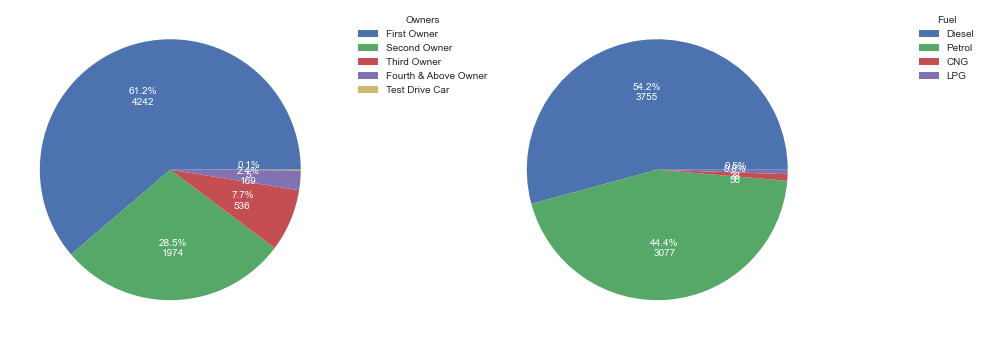

In [20]:
fig, ax = plt.subplots(figsize=(16, 6), nrows=1, ncols=2)
def func(pct, data):
    value = int(np.round(pct/100*np.sum(data)))
    return "{:.1f}%\n{:d}".format(pct, value)

def func2(pct, data):
    value = int(np.round(pct/100*np.sum(data)))
    return "{:.1f}%\n{:d}".format(pct, value)
series = [owners, fuel]
legends = ['Owners', 'Fuel']

for i, j, k in zip(ax, series, legends):
    wedges, texts, autotexts = i.pie(j.values, autopct=lambda pct: func(pct, j.values),
                                 textprops=dict(color='w'))
    i.legend(wedges, j.index, title=f'{k}', loc='upper right', bbox_to_anchor=(1, 0, 0.5, 1))
plt.show()

#### From the above, majority of car owners in the dataset are first owners, and the most used fuel type is Diesel.

##### Most first owners want to sell their cars, probably to get something better. This could be because they knew too little about cars before buying one, hence they aren't getting what they want from the cars. This indicates that the cars are probalbly still in good condition.

##### Also the most  used fuel type is diesel. This indicates that the vehicles are used regularly for them to be in good condition now. Diesel engines are also powerful and also very economical in energy consumption.

In [21]:
# labels1 = owners.index
# sizes1 = owners.values
# labels2 = fuel.index
# sizes2 = fuel.values
# pcts = [f'{s}  ({s*100/sum(sizes1):.1f}%)' for s in sizes1]
# pcts2 = [f'{s}  ({s*100/sum(sizes2):.1f}%)' for s in sizes2]
# fig, ax = plt.subplots(figsize=(13, 6), nrows=1, ncols=2)
# ax[0].axis('equal')
# ax[1].axis('equal')
# pie, _ = ax[0].pie(sizes1, startangle=0, wedgeprops=dict(width=0.5), explode=[0.1,0,0,0.3,0])
# kw = dict(arrowprops=dict(arrowstyle='->'), zorder=0, va='center')
# for i, p in enumerate(pie):
#     ang = (p.theta2 - p.theta1)/2 + p.theta1
#     y = np.sin(np.deg2rad(ang))
#     x = np.cos(np.deg2rad(ang))
#     connectionstyle = f'angle, angleA=0, angleB={ang}'
#     kw['arrowprops'].update({'connectionstyle': connectionstyle})
#     ax[0].annotate(pcts[i], xy=(x, y), xytext=(1.35*np.sign(x), 1.4*y), fontsize=12, **kw)
#     ax[0].legend(owners.index, loc='best', bbox_to_anchor=(0.7, 1))

# pie, _ = ax[1].pie(sizes2, startangle=0, wedgeprops=dict(width=0.5), explode=[0.1,0,0.3,0.3])
# kw = dict(arrowprops=dict(arrowstyle='->'), zorder=0, va='center')
# for i, p in enumerate(pie):
#     ang = (p.theta2 - p.theta1)/2 + p.theta1
#     y = np.sin(np.deg2rad(ang))
#     x = np.cos(np.deg2rad(ang))
#     connectionstyle = f'angle, angleA=0, angleB={ang}'
#     kw['arrowprops'].update({'connectionstyle': connectionstyle})
#     ax[1].annotate(pcts2[i], xy=(x, y), xytext=(1.35*np.sign(x), 1.4*y), fontsize=12, **kw)
#     ax[1].legend(fuel.index, loc='best', bbox_to_anchor=(0.7, 1))
# plt.setp(pie, edgecolor='white')
# plt.show()

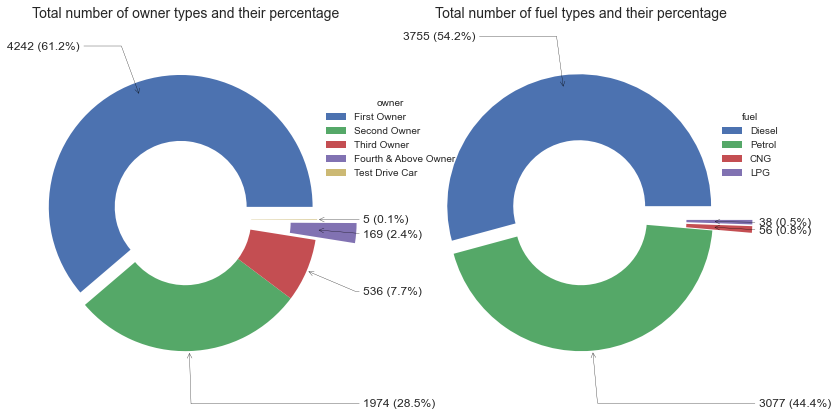

In [45]:
owner_size = [f'{s} ({s*100/sum(owners.values):.1f}%)' for s in owners.values]
fuel_size = [f'{s} ({s*100/sum(fuel.values):.1f}%)' for s in fuel.values]
data = [owner_size, fuel_size]
dataframe = [owners, fuel]
fig, ax = plt.subplots(figsize=(13, 6), nrows=1, ncols=2)
kw = dict(arrowprops=dict(arrowstyle='->'), va='center')
for plot, series, pct in zip(ax, dataframe, data):
    plot.axis('equal')
    if series.name == 'owner':
        explode = [0.1,0,0,0.3,0]
    else:
        explode = [0.1,0,0.3,0.3]
    pie, _ = plot.pie(series, wedgeprops=dict(width=0.5), explode=explode)
    for x, i in enumerate(pie):
        value = pct[x]
        ang = (i.theta2 - i.theta1)/2 + i.theta1
        x = np.cos(np.deg2rad(ang))
        y = np.sin(np.deg2rad(ang))
        connectionstyle = f'angle, angleA=0, angleB={ang}'
        kw['arrowprops'].update({'connectionstyle':connectionstyle})
        plot.annotate(value, xy=(x, y), xytext=(1.35*np.sign(x), 1.4*y), fontsize=12, **kw)
    plot.legend(series.index, title=series.name, loc='best', bbox_to_anchor=(0.9, 0.6))
    plot.set_title(f'Total number of {series.name} types and their percentage',fontdict=dict(fontsize=14), y=1.1)
plt.show()

#### From the above, majority of car owners in the dataset are first owners, and the most used fuel type is Diesel.

##### Most first owners want to sell their cars, probably to get something better. This could be because they knew too little about cars before buying one, hence they aren't getting what they want from the cars. This indicates that the cars are probalbly still in good condition.

##### Also the most  used fuel type is diesel. This indicates that the vehicles are used regularly for them to be in good condition now. Diesel engines are also powerful and also very economical in energy consumption.

## What kind of car transmission have a better sales value

In [23]:
transmission = cars.groupby(['transmission', 'age_cat'], as_index=False)\
.mean()[['transmission', 'age_cat', 'selling_price']]

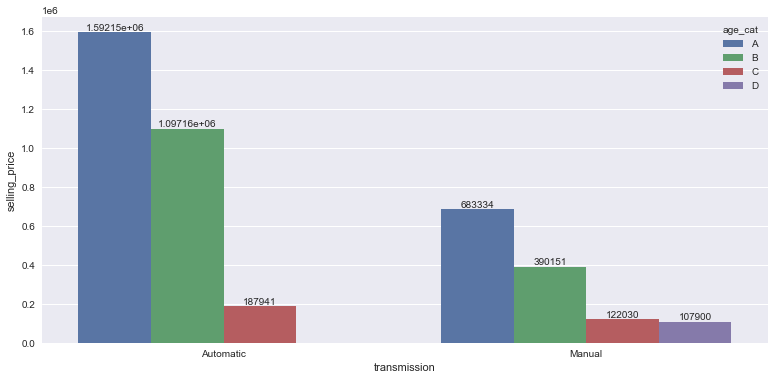

In [24]:
fig, ax = plt.subplots(figsize=(13, 6))
chart = sns.barplot(x='transmission', y='selling_price', hue='age_cat', data=transmission)
for container in chart.containers:
    chart.bar_label(container)
plt.show()

#### From the column chart above, it is visible that vehicles with automatic transmission are more expensive, and thry also have better resale value, as the category B age is still by far more valuable than the category A age of manual transmission.

## By how much does the age of a car affect its selling price?

In [25]:
fuel_type = cars.groupby(['fuel', 'age_cat'], as_index=False).mean()[['fuel', 'age_cat', 'selling_price']]

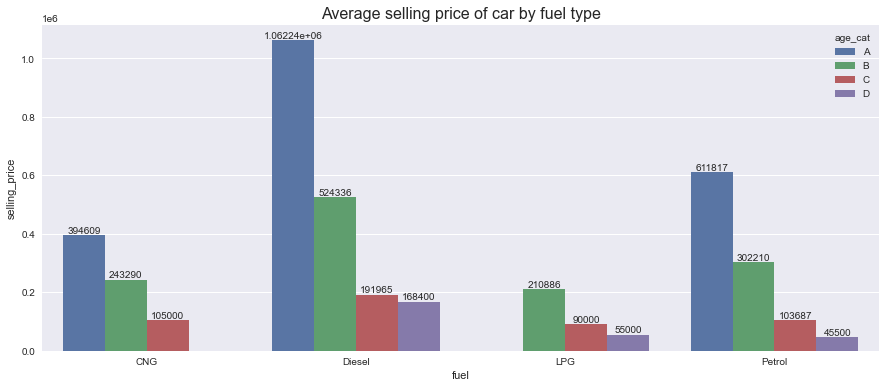

In [26]:
fig, ax = plt.subplots(figsize=(15,6))
# age_category = average_price.index.get_level_values('age_category')
chart = sns.barplot(x='fuel', y='selling_price', hue='age_cat', data=fuel_type)
plt.title('Average selling price of car by fuel type', fontdict={'fontsize':16, 'fontweight':10})
for container in chart.containers:
    chart.bar_label(container)
plt.show()

## What type of vehicle condition are more cost effective?

In [27]:
owner = cars.groupby(['owner', 'age_cat'], as_index=False)['selling_price'].\
mean()[['owner', 'age_cat','selling_price']]

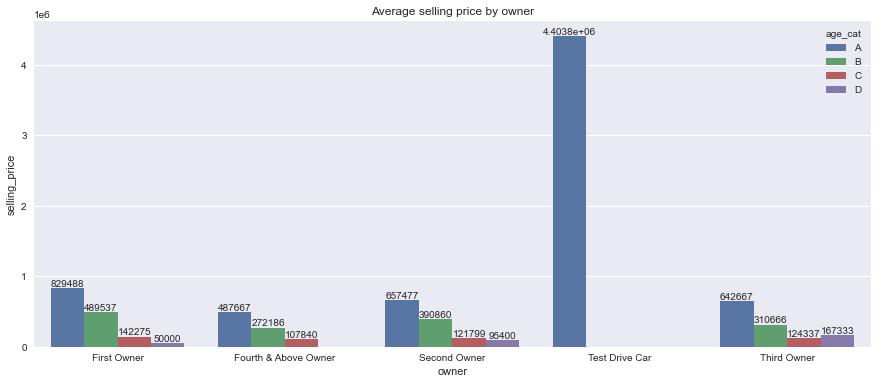

In [28]:
fig, ax = plt.subplots(figsize=(15, 6))
chart = sns.barplot(x='owner', y='selling_price', hue='age_cat', data=owner)
plt.title('Average selling price by owner')
for container in chart.containers:
    chart.bar_label(container)

## What is the effect of distance covered on selling price

In [29]:
cars.insert(10, 'mile_cat', pd.cut(cars.mileage, bins=[0,14,28,42],\
                                  labels=['A', 'B', 'C']))

In [30]:
mileage = cars.groupby(['mile_cat', 'age_cat'], as_index=False)\
.mean()[['mile_cat', 'age_cat', 'selling_price']]

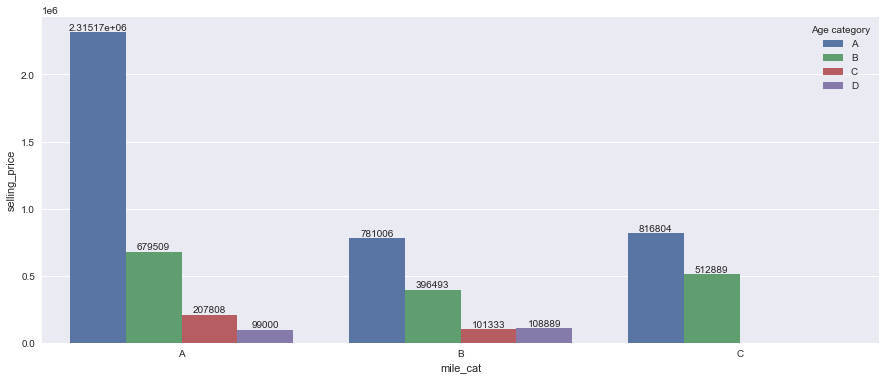

In [31]:
fig, ax = plt.subplots(figsize=(15,6))
chart = sns.barplot(x='mile_cat', y='selling_price', hue='age_cat', data=mileage)
ax.legend(loc = 'upper right', title = 'Age category')
for container in chart.containers:
    chart.bar_label(container)
plt.show()

# Which seller type is more cost effective

In [32]:
seller_type = cars.groupby(['seller_type', 'age_cat'], as_index=False)\
.mean()[['seller_type', 'age_cat', 'selling_price']]

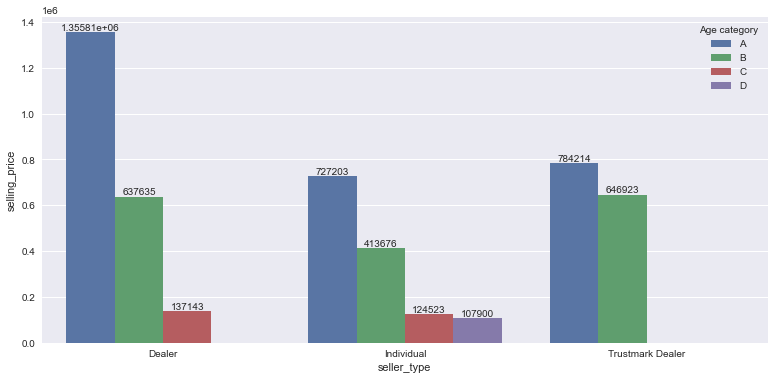

In [33]:
fig, ax = plt.subplots(figsize=(13,6))
chart = sns.barplot(x='seller_type', y='selling_price', hue='age_cat', data=seller_type)
ax.legend(loc = 'upper right', title = 'Age category')
for container in chart.containers:
    chart.bar_label(container)
plt.show()

#### For the various age categories, dealers sell at a higher price, followed by trustman dealers, then individual sellers. This is as a result of the fact that they aren't doing it for business. They are majorly people who wants to upgrade, or distress sellers. Buying from an individual is more cost effective.

## Whats the effect of number of seats in the selling price of a car?

In [34]:
cars.insert(15, 'seat_cat', pd.cut(cars.seats, bins=[0,5,8,14], labels=['car', 'minivan', 'bus']))

In [35]:
seats = cars.groupby(['seat_cat', 'age_cat'], as_index=False)\
.mean()[['seat_cat', 'age_cat', 'selling_price']]

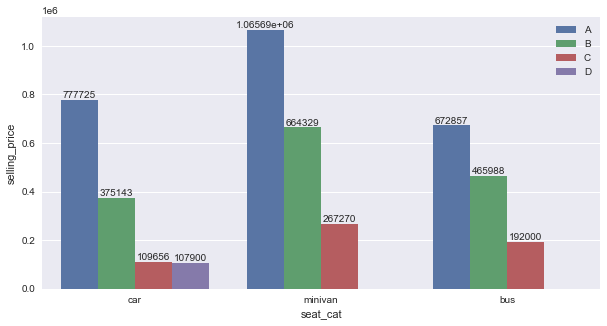

In [36]:
fig, ax = plt.subplots(figsize=(10,5))
chart = sns.barplot(x='seat_cat', y='selling_price', hue='age_cat', data=seats)
ax.legend(loc= 'upper right')
for container in chart.containers:
    chart.bar_label(container)
plt.show()

# What is the relationship between engine and selling price

In [37]:
cars.insert(12, 'eng_cat', pd.cut(cars.engine, bins=[0,901,1802,2703,3604], labels=['low', 'mid', 'high', 'super']))

In [38]:
cars.max_power.replace(0, cars.max_power.median(), inplace=True)

In [39]:
cars.insert(14, 'power_cat', pd.cut(cars.max_power, bins=[0,100,200,300,400], labels=['low', 'mid', 'high', 'super']))

In [40]:
engine = cars.groupby(['eng_cat','age_cat'], as_index=False)\
.mean()[['eng_cat', 'age_cat', 'selling_price']]

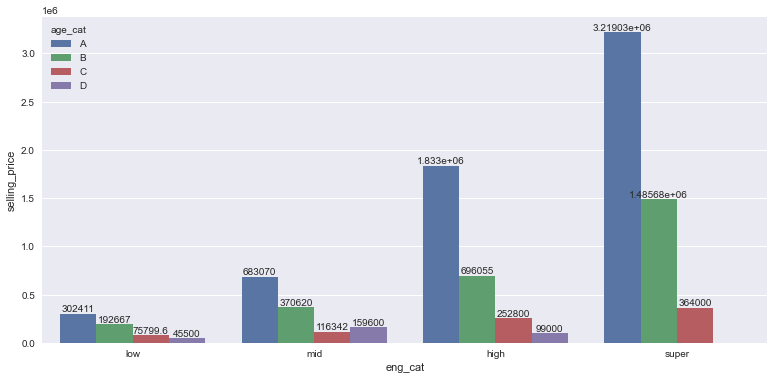

In [41]:
fig, ax = plt.subplots(figsize=(13, 6))
chart = sns.barplot(x='eng_cat', y='selling_price', hue='age_cat', data=engine, ci=False)
for container in chart.containers:
    chart.bar_label(container)

### From the above chart, ein every engine category, the newer vehicles are always more expensive, with the highest difference in the "super" category. Looking closely, engines with such power are relatively new in the automobile industry as they are not present in age above 25 years. The more powerful the engine is, and the newer the car is, the price of the car will be on the high side. It's resell value even when older is still very close to the price of a newer car by age in the "high" engine category.

# Relationship between max_power and engine

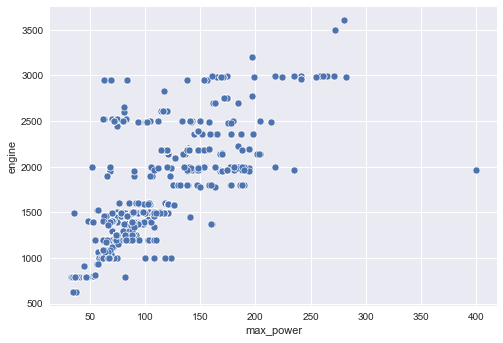

In [42]:
sns.scatterplot(x=cars.max_power, y=cars.engine)
plt.show()

### There is a positive correlation between the engine of a car and its max power. This means that, the better the engine of a car, the more power the car has, or for a car to have high power, the engine of the car has to be very good and big as well.

# Relationship between various features of the dataset

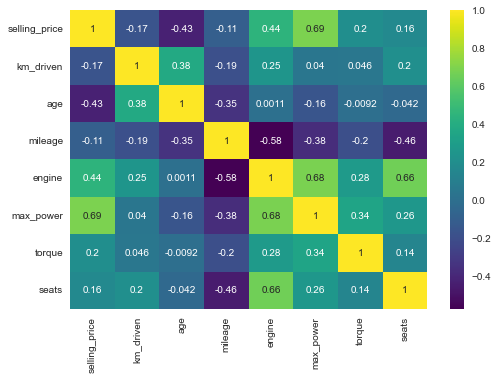

In [43]:
sns.heatmap(cars[['selling_price','km_driven', 'age', 'mileage', 'engine', 'max_power',
                  'torque', 'seats']].corr(), annot=True, cmap='viridis')
plt.show()

### There is a positive correlation between the selling price of a car and the following:
### - The engine capacity of a car,
### - The max_power of a car

### This means that, the better the car engine, and the more power a car can generate, the higher the car price is in the market.

### There is a negative correlation between the selling price of a car and the age of the car. This means that, the older the car, the lesser the price of the car in the market. that is to say, newer cars have better selling price, and older cars are sold for less.